# experimental study (parameter tuning)
#### on randomly generated instances of MS across a range of $n$ and $m$ values in order to select an appropriate value for $k$.

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
import random
import re
from itertools import compress
from copy import deepcopy

In [2]:
def import_inst(filename):
    '''
    imports a text file instance, converts it to an array and then allocates it to p and m, 
    where p are the jobs and m is the number of machines
    '''
    inst = list(map(int, re.findall('\d+', str([line.rstrip('\n') for line in open(filename)]))))
    global p, m, allowableTime
    p =  inst[2:]
    p.sort()
    p = p[::-1]
    m = inst[1]
    allowableTime = inst[0]
    
def create_instance(inp, filename):
    txter = open(filename, "w")
    for item in inp:
        txter.write(str(item))
        txter.write('\n')
    txter.close()

class agent:
    def __init__(self): 
        self.initialTime = time.time()
        self.allocation = {} # a dict for tracking  the allocated jobs to machines
        self.workload = np.zeros(m) # np.array of length m, where self.workload[machine] = sum of processing times of jobs assigned to machine
        self.cost = None # cost of current feasible solution
        self.costTrajectory = [] # list of cost of feasible solution found in each step
        self.workload_so_far = []
        self.allocation_so_far = []
        self.time_taken = None

        
    # generates a greedy initial feasible solution
    def generateGreedySolution(self):
        for i in range(m):
            self.allocation[i] = [p[i]]
            self.workload[i] += p[i]
        for i in range(m,len(p)):
            worker = np.argmin(self.workload)
            self.allocation[worker].append(p[i])
            self.workload[worker] += p[i]
        self.cost = np.max(self.workload)
        self.costTrajectory.append(self.cost)
        
        
    # switch assigned machine of 'job' to 'toMachine'
    def switchMachine(self,  job, fromMachine, toMachine):
        self.workload[fromMachine] += - job
        self.allocation[fromMachine].remove(job)
        self.workload[toMachine] += job
        self.allocation[toMachine].append(job)
    
    def Swap(self, Big, big_candidate, Small, small_candidate):
        self.switchMachine(Big, big_candidate, small_candidate)
        self.switchMachine(Small, small_candidate, big_candidate)
    
    def greedySearchIteration(self,k):
        ind = np.argsort(self.workload)
        for i in range(k):
            big_candidate = ind[-(i+1)]
            small_candidate = ind[i]
            Big = np.max(self.allocation[big_candidate])
            Small = np.max(list(compress(self.allocation[small_candidate],
                                     [i < Big for i in self.allocation[small_candidate]])))
            self.Swap(Big, big_candidate, Small, small_candidate)
        self.cost = np.max(self.workload)
        self.costTrajectory.append(self.cost)
        self.workload_so_far.append(deepcopy(self.workload))
        self.allocation_so_far.append(deepcopy(self.allocation))
    
    def print_results(self):
        plt.bar(range(m),self.workload)
        plt.hlines(np.average(self.workload),0,len(self.workload), colors= 'y')
        plt.show()
#         print('best workload found:', self.workload)
#         print('best allocation found:', self.allocation)
        print('neighbours visited:', self.costTrajectory)
        print('approximation ratio:',  self.cost/np.average(self.workload))
        print('time taken:', self.time_taken)
    
    def greedySearch(self,totalTime,k):
        self.generateGreedySolution()
        self.workload_so_far.append(deepcopy(self.workload))
        self.allocation_so_far.append(deepcopy(self.allocation))
        while time.time() - self.initialTime < totalTime - 0.31:
            self.greedySearchIteration(k)
            if self.cost > self.costTrajectory[-2]:
                self.workload = deepcopy(self.workload_so_far[-2])
                self.allocation = deepcopy(self.allocation_so_far[-2])
                self.cost = np.max(self.workload)
                self.costTrajectory.append(self.cost)
                self.time_taken = time.time() - self.initialTime
#                 self.print_results()
                return
            if self.cost == self.costTrajectory[-2]:
                self.time_taken = time.time() - self.initialTime
#                 self.print_results()
                return
        print('*****ALLOCATED TIME EXPIRED!*****')
        self.time_taken = time.time() - self.initialTime
#         print('BEST RESULT:')
#         self.print_results()
    
    def verifyFeasibleSolution(self):
        # check that each job is assigned to exactly one machine
        assert(sum([len(self.allocation[i]) for i in range(m)]) == len(p))
        # check that there are at most m machines that have jobs assigned to them
        assert(len(self.allocation) <= m)

        # check that the workloads are as indicated in A.workload
        for i in range(m):
            assert(self.workload[i] == sum(self.allocation[i]))

        # check that the maximum of the workloads (i.e. the cost) is as indicated in A.cost
        assert(np.isclose(self.cost, np.max(self.workload)))

def set_inst(ind):
    '''
    takes an instance, converts it to an array and then allocates it to p and m, 
    where p are the jobs and m is the number of machines
    '''
    inst = ind
    global p, m, allowableTime
    p =  inst[2:]
    p.sort()
    p = p[::-1]
    m = inst[1]
    allowableTime = inst[0]
    return p, m, allowableTime

In [3]:
#range of different m
M = [np.random.randint(50,i) for i in range(100,10000,100)]
P = np.random.randint(2000,40000,len(M))
instances = {i:np.append(30,np.append(M[i],1 + np.random.randint(np.random.randint(1000,10000),size = P[i]) )) for i in range(len(M))}

In [3]:
# large variety of m and p
# M = np.random.randint(200,400,10)
# P = np.random.randint(2000,40000,10)
# instances = {i:np.append(30,np.append(M[i],1 + np.random.randint(np.random.randint(1000,10000),size = P[i]) )) for i in range(len(M))}


In [5]:
instances[]

array([  30,  385,  695, ...,  755, 1333,  636])

In [6]:
p = np.random.randint(0,20,6)

In [7]:
p

array([ 2, 13, 10,  9, 11, 16])

In [8]:
ind = np.argsort(p)

In [10]:
ind[-1]

16

In [ ]:
[2,5,4,1] [1,5]

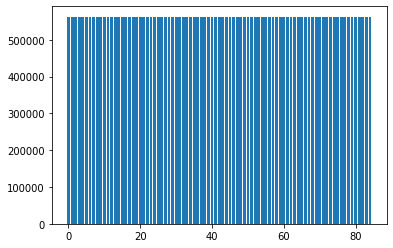

neighbours visited: [562532.0]
approximation ratio: 1.0000013803155376
time taken: None


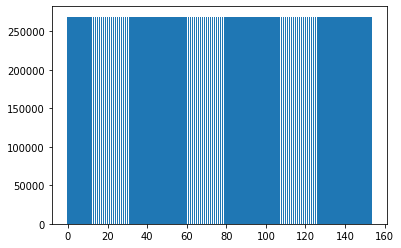

neighbours visited: [268757.0]
approximation ratio: 1.0000331745040527
time taken: None


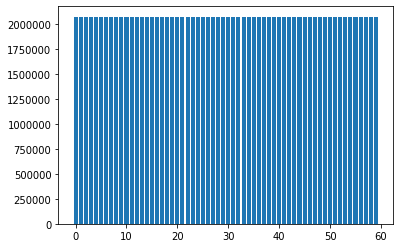

neighbours visited: [2073834.0]
approximation ratio: 1.000000940288294
time taken: None


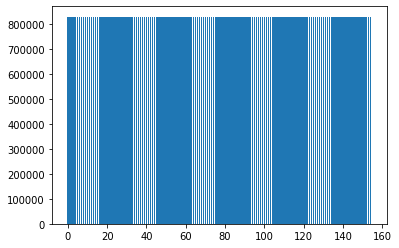

neighbours visited: [829426.0]
approximation ratio: 1.0000119555543052
time taken: None


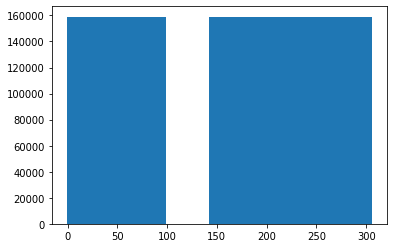

neighbours visited: [159019.0]
approximation ratio: 1.0003939503113568
time taken: None


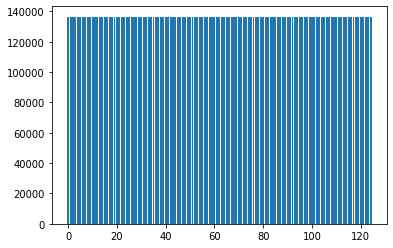

neighbours visited: [136469.0]
approximation ratio: 1.0006256467416423
time taken: None


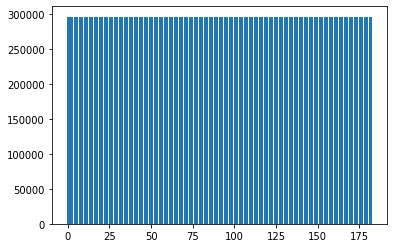

neighbours visited: [295979.0]
approximation ratio: 1.000017410340531
time taken: None


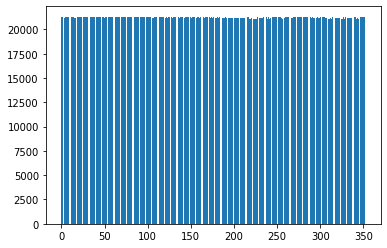

neighbours visited: [21303.0]
approximation ratio: 1.0036387441367893
time taken: None


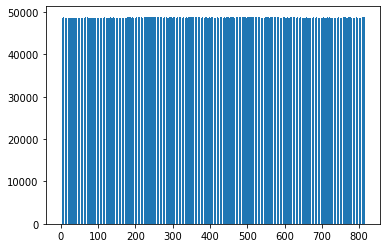

neighbours visited: [48870.0]
approximation ratio: 1.0033772024273075
time taken: None


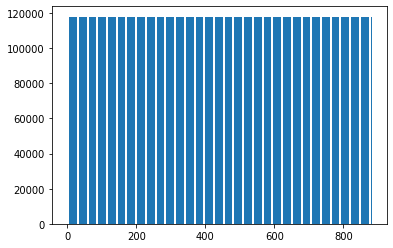

neighbours visited: [117926.0]
approximation ratio: 1.0007830319196063
time taken: None


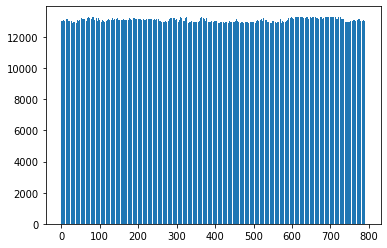

neighbours visited: [13302.0]
approximation ratio: 1.0157876526256888
time taken: None


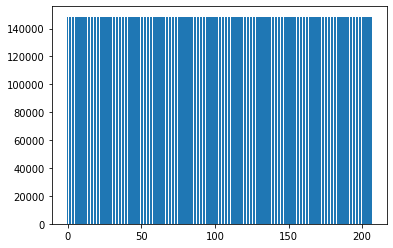

neighbours visited: [148508.0]
approximation ratio: 1.0000953210507335
time taken: None


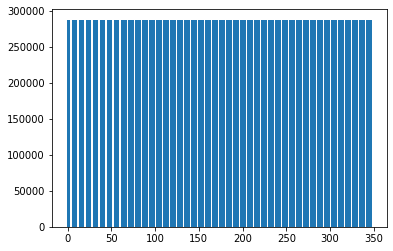

neighbours visited: [287881.0]
approximation ratio: 1.0000351071333053
time taken: None


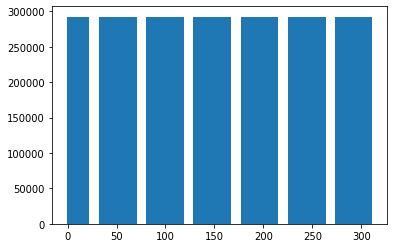

neighbours visited: [292516.0]
approximation ratio: 1.0000349568496167
time taken: None


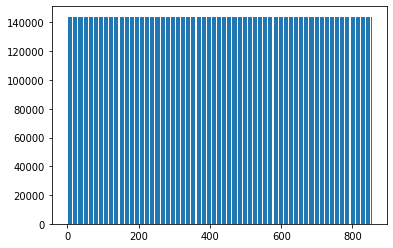

neighbours visited: [144004.0]
approximation ratio: 1.0003524351584017
time taken: None


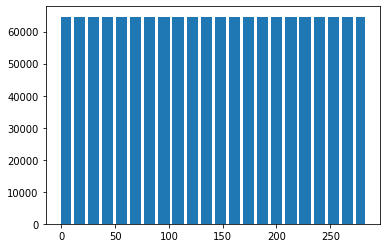

neighbours visited: [64655.0]
approximation ratio: 1.000050665599501
time taken: None


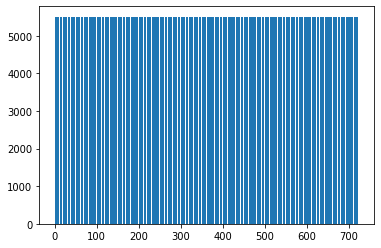

neighbours visited: [5505.0]
approximation ratio: 1.0018839648360034
time taken: None


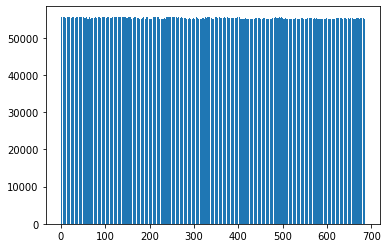

neighbours visited: [55669.0]
approximation ratio: 1.0061395538597526
time taken: None


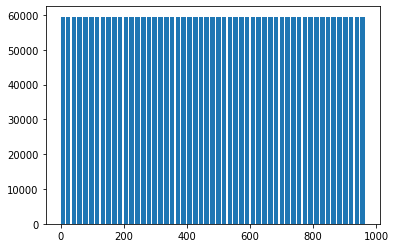

neighbours visited: [59487.0]
approximation ratio: 1.0001661129047692
time taken: None


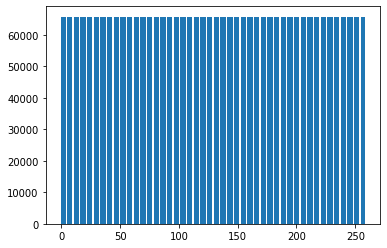

neighbours visited: [65737.0]
approximation ratio: 1.000231583460429
time taken: None


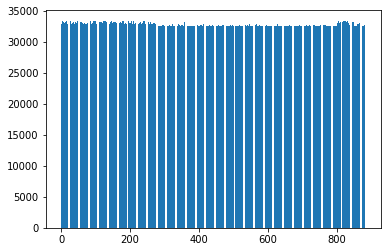

neighbours visited: [33437.0]
approximation ratio: 1.0180203625239672
time taken: None


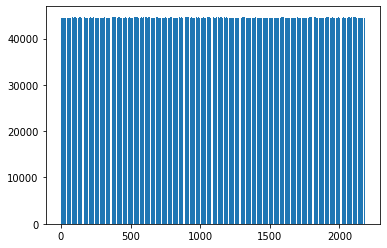

neighbours visited: [44703.0]
approximation ratio: 1.0053925410488564
time taken: None


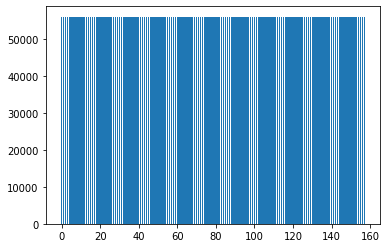

neighbours visited: [56134.0]
approximation ratio: 1.0001365590128328
time taken: None


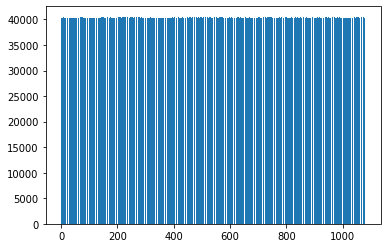

neighbours visited: [40537.0]
approximation ratio: 1.0039217338480173
time taken: None


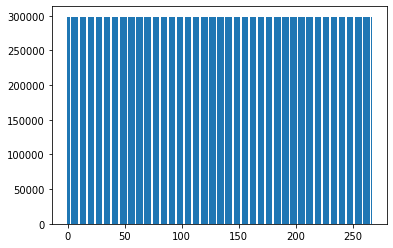

neighbours visited: [298550.0]
approximation ratio: 1.000030610807296
time taken: None


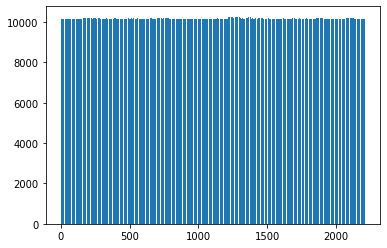

neighbours visited: [10264.0]
approximation ratio: 1.0092161455517055
time taken: None


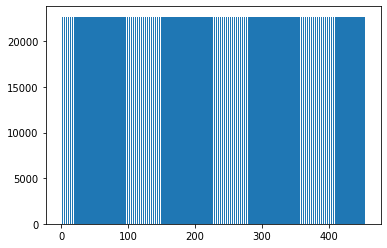

neighbours visited: [22712.0]
approximation ratio: 1.0003898379592586
time taken: None


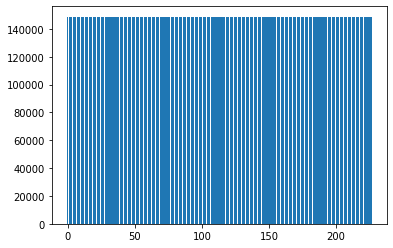

neighbours visited: [148825.0]
approximation ratio: 1.0000289204718993
time taken: None


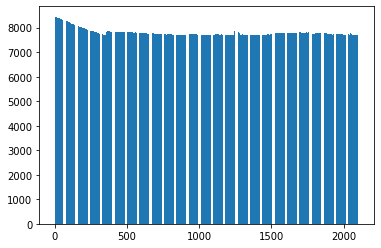

neighbours visited: [8446.0]
approximation ratio: 1.0830979665085756
time taken: None


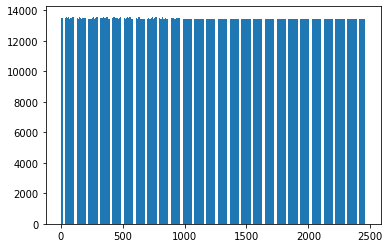

neighbours visited: [13580.0]
approximation ratio: 1.0098969073784883
time taken: None


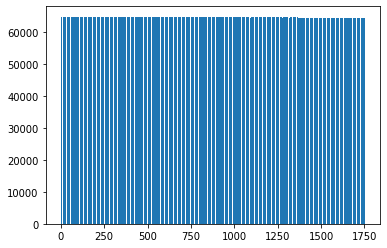

neighbours visited: [64770.0]
approximation ratio: 1.0024059662085352
time taken: None


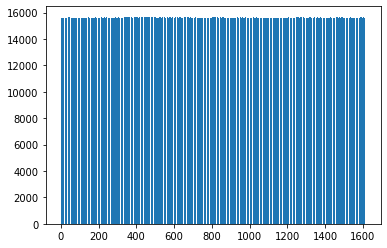

neighbours visited: [15690.0]
approximation ratio: 1.00420917762912
time taken: None


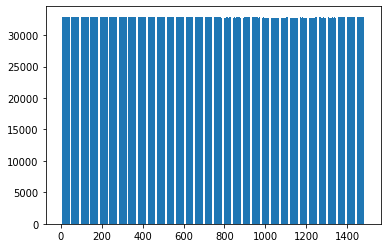

neighbours visited: [32928.0]
approximation ratio: 1.0026760729607704
time taken: None


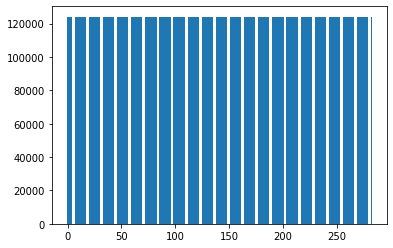

neighbours visited: [124113.0]
approximation ratio: 1.0001909601579826
time taken: None


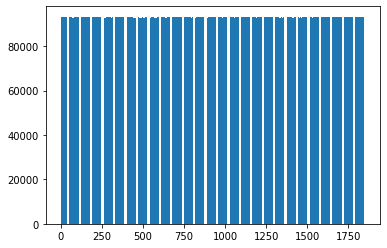

neighbours visited: [93219.0]
approximation ratio: 1.0022514665693714
time taken: None


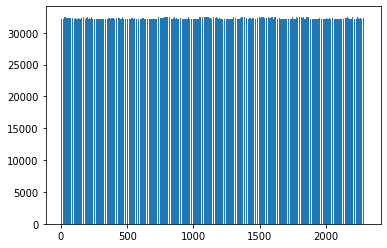

neighbours visited: [32507.0]
approximation ratio: 1.007493400064029
time taken: None


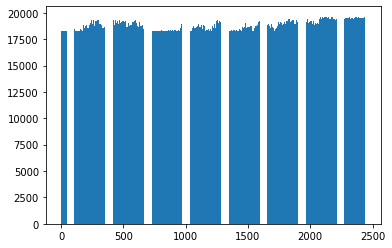

neighbours visited: [19625.0]
approximation ratio: 1.0416845915796624
time taken: None


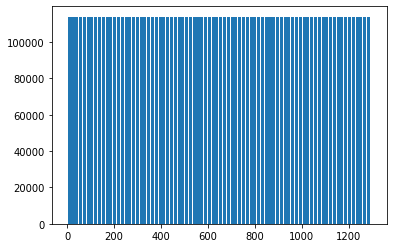

neighbours visited: [113980.0]
approximation ratio: 1.0005489471569549
time taken: None


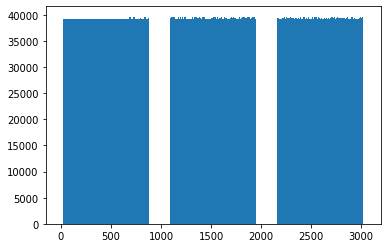

neighbours visited: [39621.0]
approximation ratio: 1.0070679623550078
time taken: None


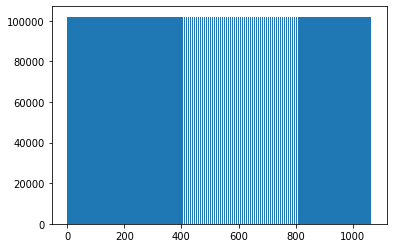

neighbours visited: [102015.0]
approximation ratio: 1.0004908521843632
time taken: None


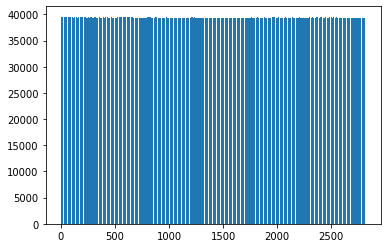

neighbours visited: [39569.0]
approximation ratio: 1.0041234183367094
time taken: None


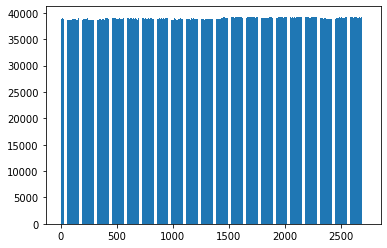

neighbours visited: [39267.0]
approximation ratio: 1.0073852100505833
time taken: None


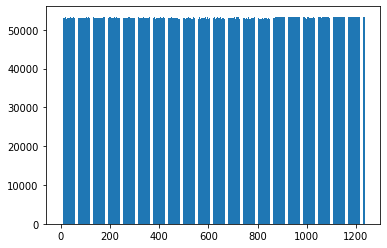

neighbours visited: [53360.0]
approximation ratio: 1.0048545234819408
time taken: None


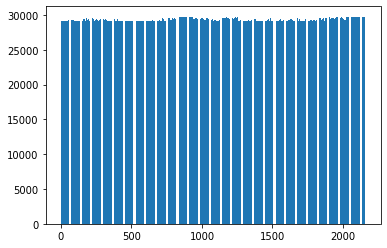

neighbours visited: [29748.0]
approximation ratio: 1.0141954670313011
time taken: None


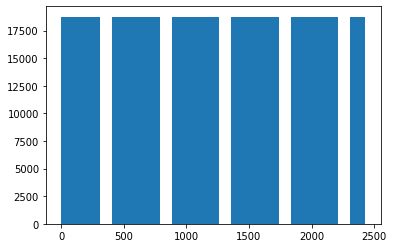

neighbours visited: [18750.0]
approximation ratio: 1.0009415496049276
time taken: None


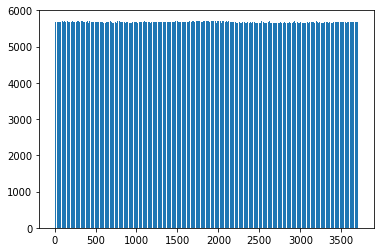

neighbours visited: [5717.0]
approximation ratio: 1.0068534409338947
time taken: None


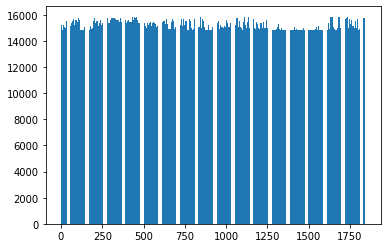

neighbours visited: [15860.0]
approximation ratio: 1.040712056887076
time taken: None


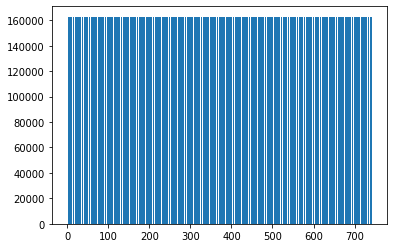

neighbours visited: [162764.0]
approximation ratio: 1.000728860346584
time taken: None


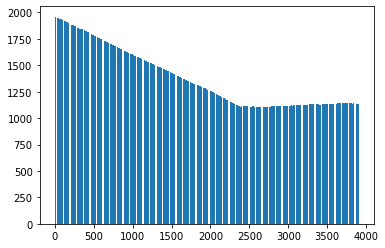

neighbours visited: [1960.0]
approximation ratio: 1.424291037302365
time taken: None


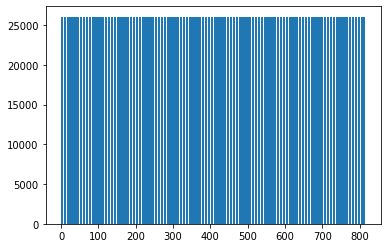

neighbours visited: [26065.0]
approximation ratio: 1.0002104910309941
time taken: None


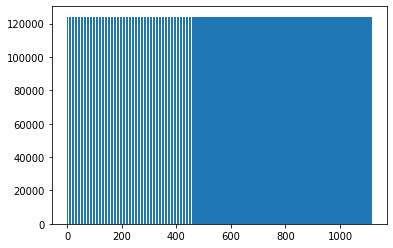

neighbours visited: [124136.0]
approximation ratio: 1.0006056326049637
time taken: None


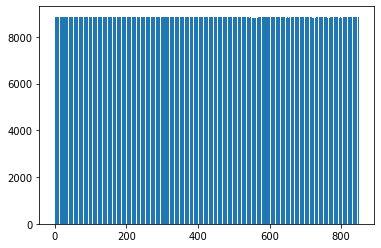

neighbours visited: [8859.0]
approximation ratio: 1.0029857211243765
time taken: None


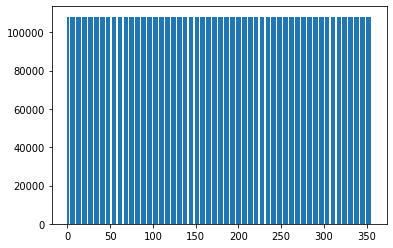

neighbours visited: [108141.0]
approximation ratio: 1.0001157590818663
time taken: None


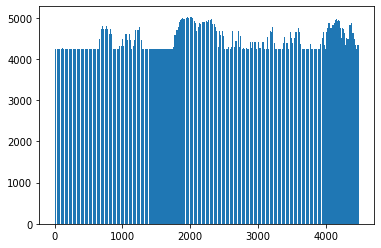

neighbours visited: [5025.0]
approximation ratio: 1.1240407186985504
time taken: None


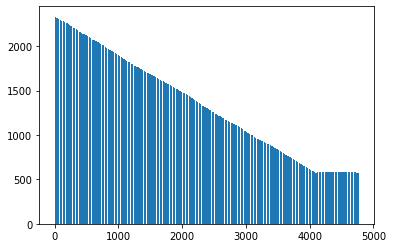

neighbours visited: [2332.0]
approximation ratio: 1.754659659139246
time taken: None


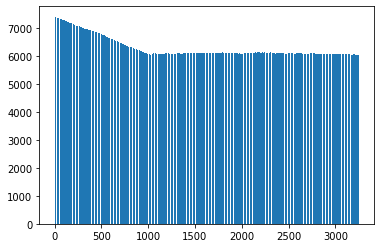

neighbours visited: [7407.0]
approximation ratio: 1.1765642792663573
time taken: None


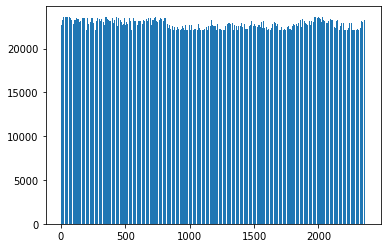

neighbours visited: [23642.0]
approximation ratio: 1.0368350652786764
time taken: None


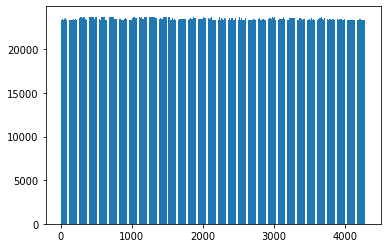

neighbours visited: [23739.0]
approximation ratio: 1.0097499124489466
time taken: None


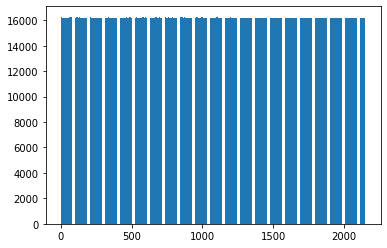

neighbours visited: [16284.0]
approximation ratio: 1.0054736447597346
time taken: None


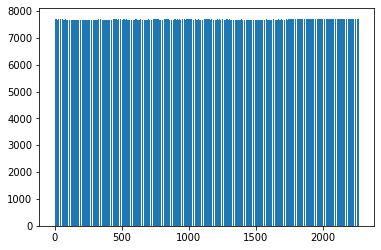

neighbours visited: [7713.0]
approximation ratio: 1.0033737009633787
time taken: None


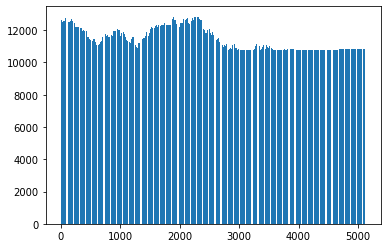

neighbours visited: [12830.0]
approximation ratio: 1.1216888056928525
time taken: None


IndexError: index 3056 is out of bounds for axis 0 with size 3056

In [20]:
for i in range(len(instances)):
    set_inst(instances[i])
    A = agent()
    A.generateGreedySolution()
    A.print_results()

k is:  10


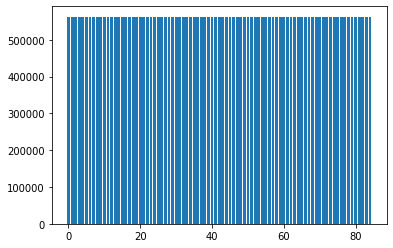

neighbours visited: [562532.0, 562533.0, 562532.0]
approximation ratio: 1.0000013803155376
time taken: 0.3041858673095703
k is:  10


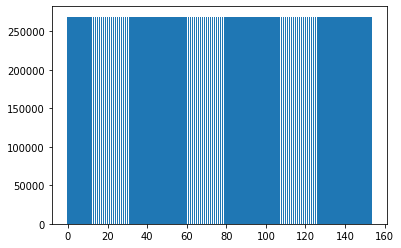

neighbours visited: [268757.0, 268825.0, 268757.0]
approximation ratio: 1.0000331745040527
time taken: 0.1246495246887207
k is:  4


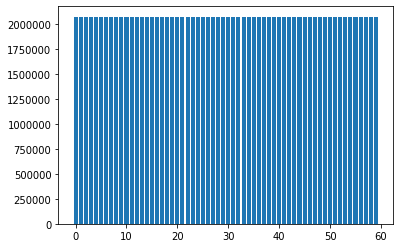

neighbours visited: [2073834.0, 2073840.0, 2073834.0]
approximation ratio: 1.000000940288294
time taken: 0.3470945358276367
k is:  7


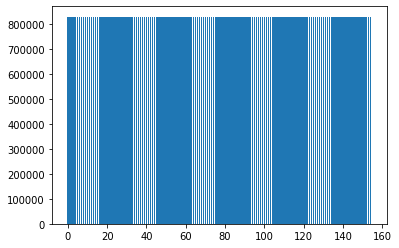

neighbours visited: [829426.0, 829448.0, 829426.0]
approximation ratio: 1.0000119555543052
time taken: 0.2343747615814209
k is:  1


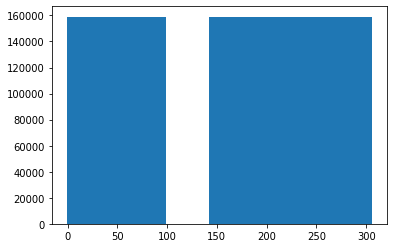

neighbours visited: [159019.0, 159019.0]
approximation ratio: 1.0003939503113568
time taken: 0.08080816268920898
k is:  7


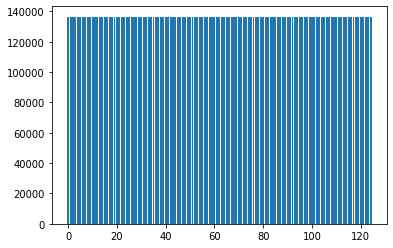

neighbours visited: [136469.0, 136605.0, 136469.0]
approximation ratio: 1.0006256467416423
time taken: 0.042867183685302734
k is:  7


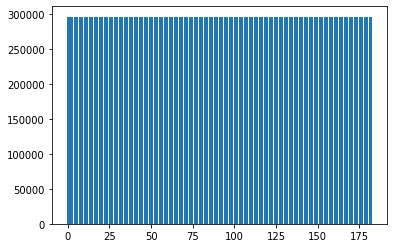

neighbours visited: [295979.0, 295981.0, 295979.0]
approximation ratio: 1.000017410340531
time taken: 0.29924607276916504
k is:  3


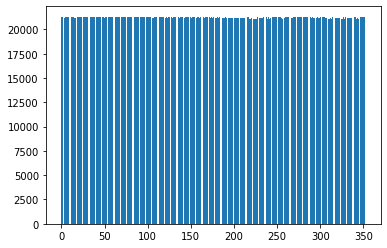

neighbours visited: [21303.0, 21705.0, 21303.0]
approximation ratio: 1.0036387441367893
time taken: 0.026928186416625977
k is:  10


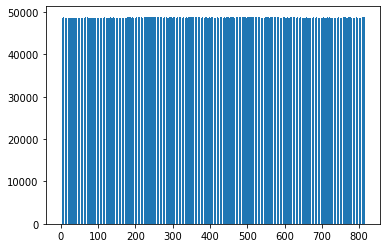

neighbours visited: [48870.0, 49103.0, 48870.0]
approximation ratio: 1.0033772024273075
time taken: 0.13164973258972168
k is:  9


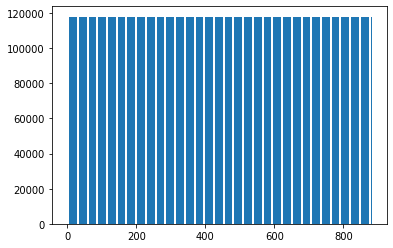

neighbours visited: [117926.0, 118005.0, 117926.0]
approximation ratio: 1.0007830319196063
time taken: 0.27028512954711914
k is:  8


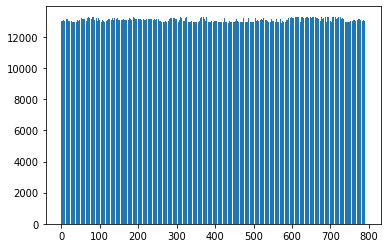

neighbours visited: [13302.0, 13299.0, 13297.0, 13308.0, 13297.0]
approximation ratio: 1.0154058349844974
time taken: 0.07878470420837402
k is:  6


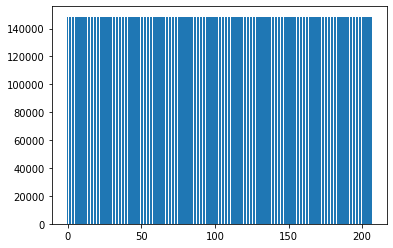

neighbours visited: [148508.0, 148604.0, 148508.0]
approximation ratio: 1.0000953210507335
time taken: 0.08776450157165527
k is:  7


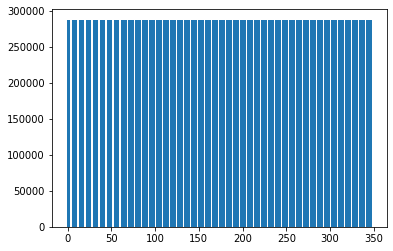

neighbours visited: [287881.0, 287939.0, 287881.0]
approximation ratio: 1.0000351071333053
time taken: 0.31316351890563965
k is:  5


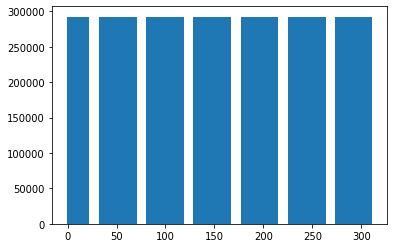

neighbours visited: [292516.0, 292532.0, 292516.0]
approximation ratio: 1.0000349568496167
time taken: 0.2622983455657959
k is:  7


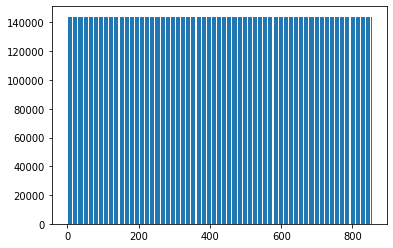

neighbours visited: [144004.0, 144069.0, 144004.0]
approximation ratio: 1.0003524351584017
time taken: 0.34906625747680664
k is:  4


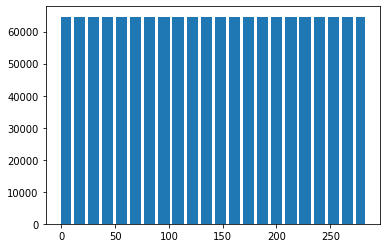

neighbours visited: [64655.0, 64656.0, 64655.0]
approximation ratio: 1.000050665599501
time taken: 0.2902233600616455
k is:  10


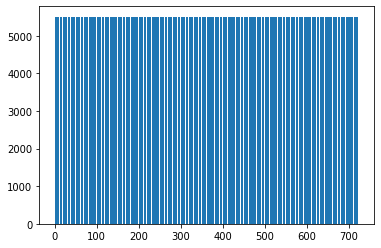

neighbours visited: [5505.0, 5580.0, 5505.0]
approximation ratio: 1.0018839648360034
time taken: 0.07781314849853516
k is:  10


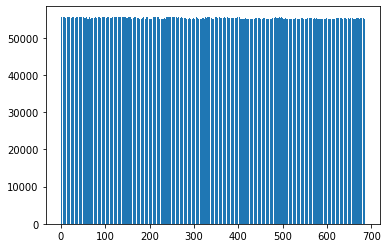

neighbours visited: [55669.0, 55757.0, 55669.0]
approximation ratio: 1.0061395538597526
time taken: 0.07381224632263184
k is:  3


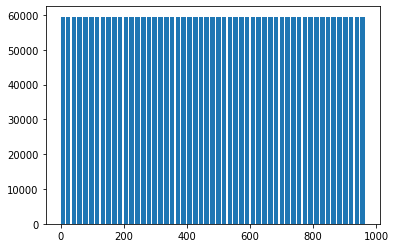

neighbours visited: [59487.0, 59496.0, 59487.0]
approximation ratio: 1.0001661129047692
time taken: 0.43688035011291504
k is:  3


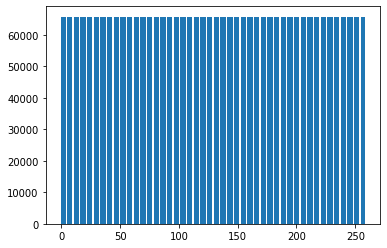

neighbours visited: [65737.0, 65754.0, 65737.0]
approximation ratio: 1.000231583460429
time taken: 0.11771941184997559
k is:  5


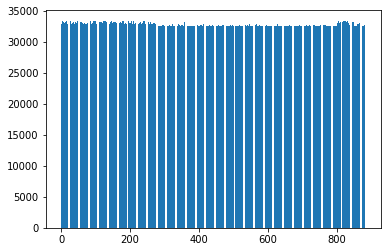

neighbours visited: [33437.0, 33859.0, 33437.0]
approximation ratio: 1.0180203625239672
time taken: 0.0797872543334961
k is:  7


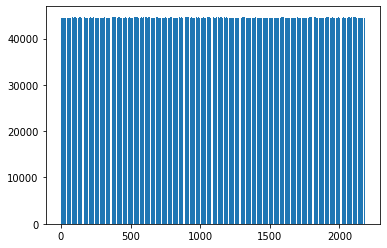

neighbours visited: [44703.0, 44914.0, 44703.0]
approximation ratio: 1.0053925410488564
time taken: 0.37006664276123047
k is:  8


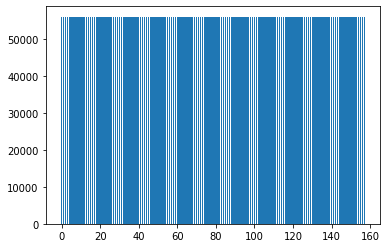

neighbours visited: [56134.0, 56226.0, 56134.0]
approximation ratio: 1.0001365590128328
time taken: 0.06083488464355469
k is:  8


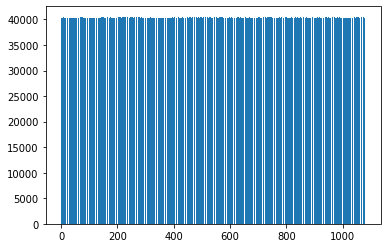

neighbours visited: [40537.0, 41665.0, 40537.0]
approximation ratio: 1.0039217338480173
time taken: 0.10671257972717285
k is:  5


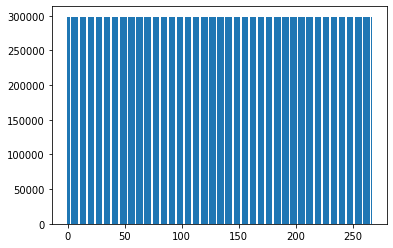

neighbours visited: [298550.0, 298549.0, 298562.0, 298549.0]
approximation ratio: 1.0000272611820715
time taken: 0.3620636463165283
k is:  3


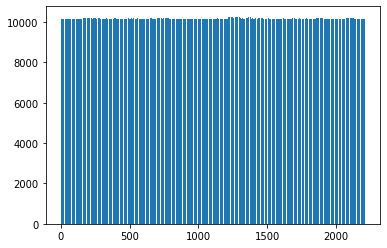

neighbours visited: [10264.0, 10287.0, 10264.0]
approximation ratio: 1.0092161455517055
time taken: 0.10574007034301758
k is:  7


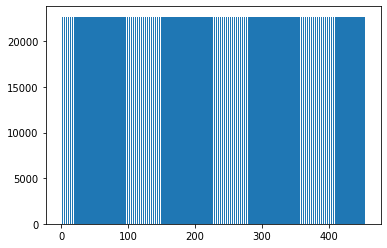

neighbours visited: [22712.0, 22717.0, 22712.0]
approximation ratio: 1.0003898379592586
time taken: 0.15857911109924316
k is:  6


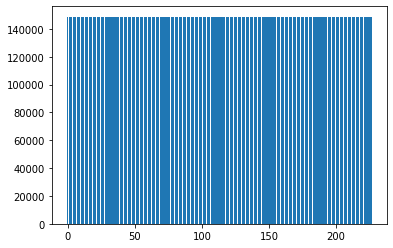

neighbours visited: [148825.0, 148825.0]
approximation ratio: 1.0000289204718993
time taken: 0.2124631404876709
k is:  7


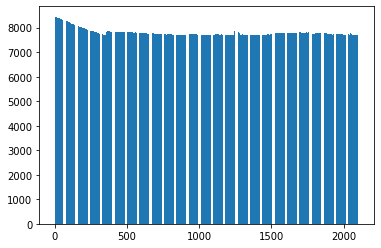

neighbours visited: [8446.0, 12238.0, 8446.0]
approximation ratio: 1.0830979665085756
time taken: 0.05980491638183594
k is:  3


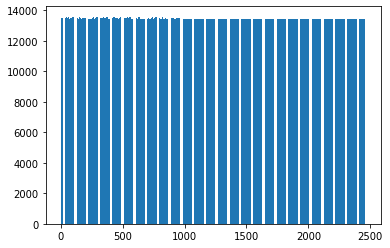

neighbours visited: [13580.0, 13579.0, 14237.0, 13579.0]
approximation ratio: 1.0098225408904633
time taken: 0.34457945823669434
k is:  1


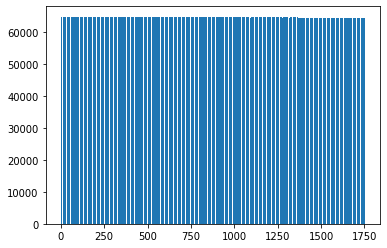

neighbours visited: [64770.0, 64807.0, 64770.0]
approximation ratio: 1.0024059662085352
time taken: 0.30728697776794434
k is:  8


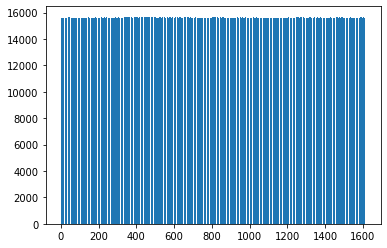

neighbours visited: [15690.0, 15763.0, 15690.0]
approximation ratio: 1.00420917762912
time taken: 0.2144184112548828
k is:  9


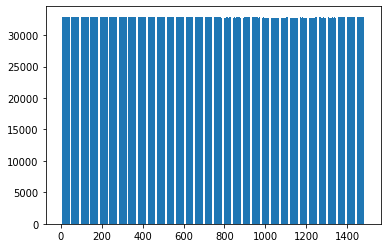

neighbours visited: [32928.0, 33702.0, 32928.0]
approximation ratio: 1.0026760729607704
time taken: 0.12267184257507324
k is:  6


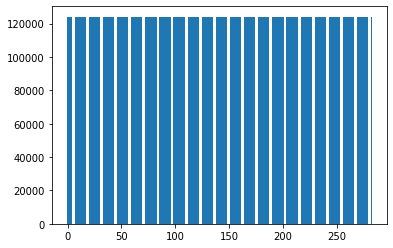

neighbours visited: [124113.0, 124174.0, 124113.0]
approximation ratio: 1.0001909601579826
time taken: 0.14464688301086426
k is:  6


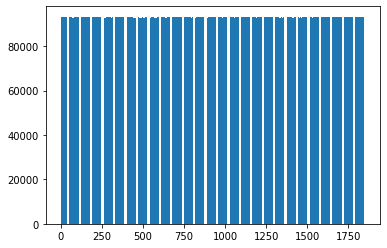

neighbours visited: [93219.0, 93450.0, 93219.0]
approximation ratio: 1.0022514665693714
time taken: 0.3441131114959717
k is:  9


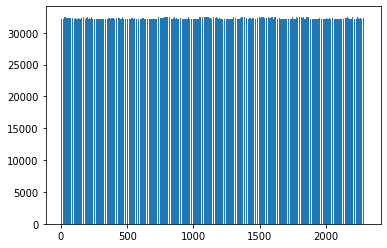

neighbours visited: [32507.0, 33034.0, 32507.0]
approximation ratio: 1.007493400064029
time taken: 0.2314298152923584
k is:  6


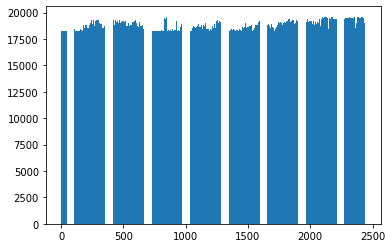

neighbours visited: [19625.0, 19623.0, 19619.0, 19616.0, 19609.0, 19606.0, 19860.0, 19606.0]
approximation ratio: 1.0406760816566045
time taken: 0.2765836715698242
k is:  9


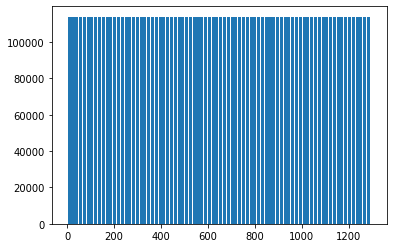

neighbours visited: [113980.0, 114119.0, 113980.0]
approximation ratio: 1.0005489471569549
time taken: 0.35205674171447754
k is:  10


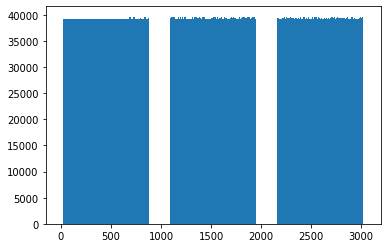

neighbours visited: [39621.0, 39715.0, 39621.0]
approximation ratio: 1.0070679623550078
time taken: 0.4528932571411133
k is:  5


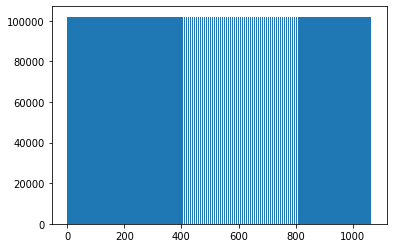

neighbours visited: [102015.0, 102071.0, 102015.0]
approximation ratio: 1.0004908521843632
time taken: 0.329085111618042
k is:  4


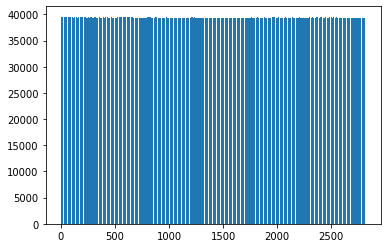

neighbours visited: [39569.0, 39711.0, 39569.0]
approximation ratio: 1.0041234183367094
time taken: 0.2505316734313965
k is:  9


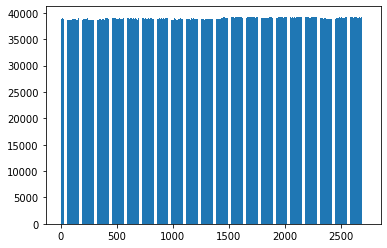

neighbours visited: [39267.0, 39540.0, 39267.0]
approximation ratio: 1.0073852100505833
time taken: 0.31615519523620605
k is:  10


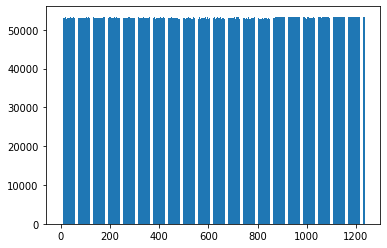

neighbours visited: [53360.0, 53466.0, 53360.0]
approximation ratio: 1.0048545234819408
time taken: 0.15561676025390625
k is:  10


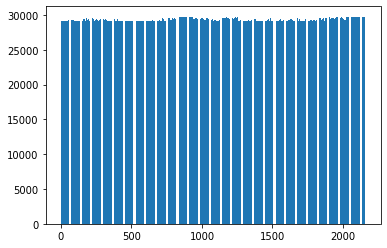

neighbours visited: [29748.0, 30019.0, 29748.0]
approximation ratio: 1.0141954670313011
time taken: 0.16954588890075684
k is:  2


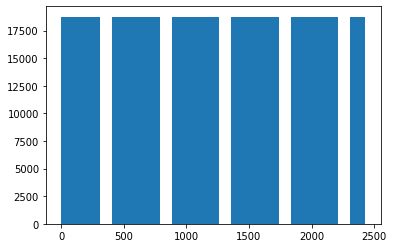

neighbours visited: [18750.0, 18978.0, 18750.0]
approximation ratio: 1.0009415496049276
time taken: 0.2622981071472168
k is:  9


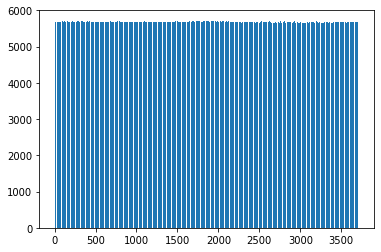

neighbours visited: [5717.0, 5716.0, 5716.0]
approximation ratio: 1.0066773252366874
time taken: 0.3919820785522461
k is:  4


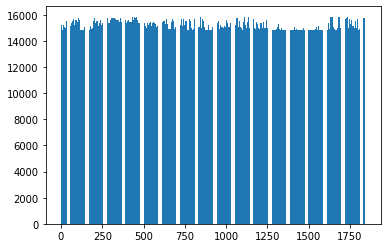

neighbours visited: [15860.0, 16114.0, 15860.0]
approximation ratio: 1.040712056887076
time taken: 0.10347747802734375
k is:  9


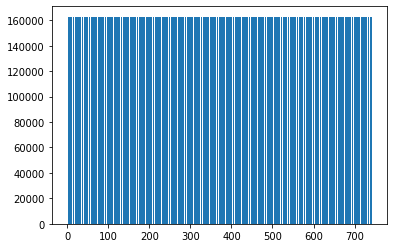

neighbours visited: [162764.0, 162830.0, 162764.0]
approximation ratio: 1.000728860346584
time taken: 0.23242735862731934
k is:  9


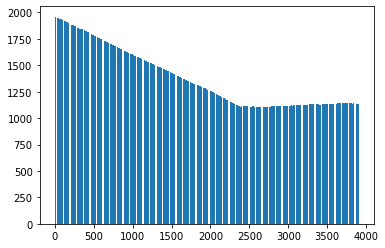

neighbours visited: [1960.0, 2064.0, 1960.0]
approximation ratio: 1.424291037302365
time taken: 0.10076570510864258
k is:  5


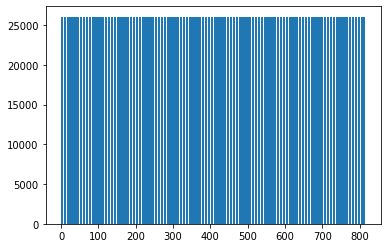

neighbours visited: [26065.0, 26090.0, 26065.0]
approximation ratio: 1.0002104910309941
time taken: 0.21046733856201172
k is:  1


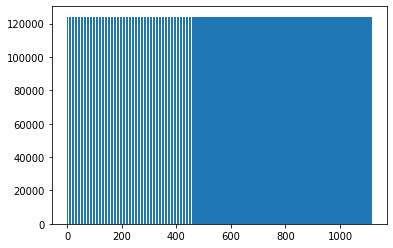

neighbours visited: [124136.0, 124136.0]
approximation ratio: 1.0006056326049637
time taken: 0.2736072540283203
k is:  6


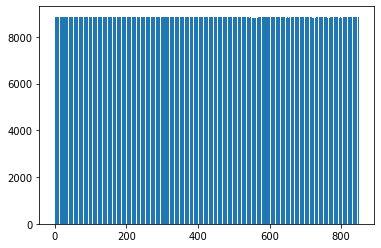

neighbours visited: [8859.0, 9144.0, 8859.0]
approximation ratio: 1.0029857211243765
time taken: 0.05760359764099121
k is:  4


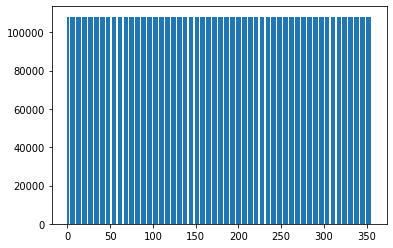

neighbours visited: [108141.0, 108149.0, 108141.0]
approximation ratio: 1.0001157590818663
time taken: 0.23940777778625488
k is:  8


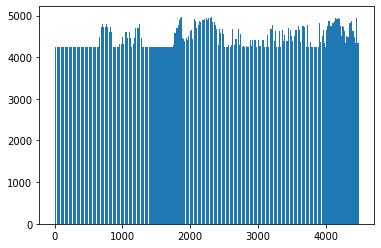

neighbours visited: [5025.0, 5022.0, 5018.0, 5014.0, 5009.0, 5007.0, 5004.0, 5003.0, 4998.0, 4995.0, 4993.0, 4991.0, 4988.0, 4985.0, 4982.0, 4981.0, 4979.0, 4978.0, 4976.0, 4974.0, 4973.0, 4971.0, 4971.0]
approximation ratio: 1.1119614751543272
time taken: 0.827855110168457
k is:  8


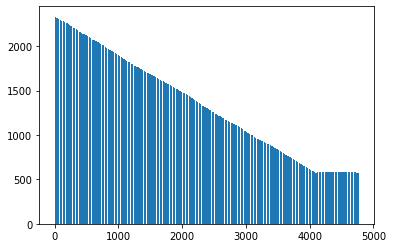

neighbours visited: [2332.0, 2619.0, 2332.0]
approximation ratio: 1.754659659139246
time taken: 0.09877562522888184
k is:  4


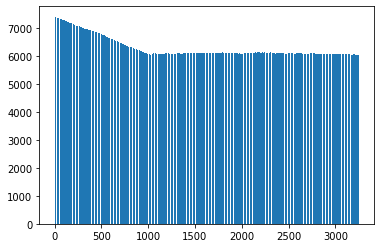

neighbours visited: [7407.0, 10429.0, 7407.0]
approximation ratio: 1.1765642792663573
time taken: 0.07571244239807129
k is:  4


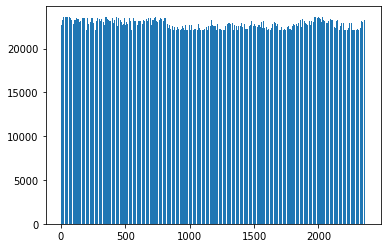

neighbours visited: [23642.0, 23663.0, 23642.0]
approximation ratio: 1.0368350652786764
time taken: 0.13566875457763672
k is:  1


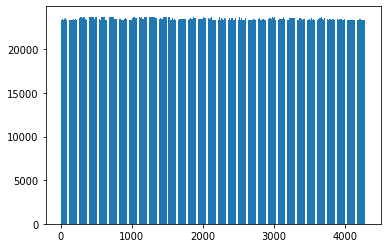

neighbours visited: [23739.0, 23739.0]
approximation ratio: 1.0097499124489466
time taken: 0.3810296058654785
k is:  1


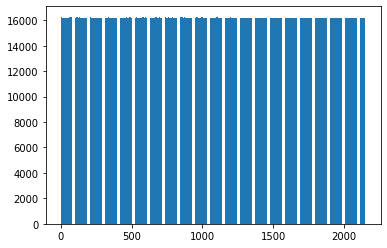

neighbours visited: [16284.0, 16804.0, 16284.0]
approximation ratio: 1.0054736447597346
time taken: 0.2064955234527588
k is:  9


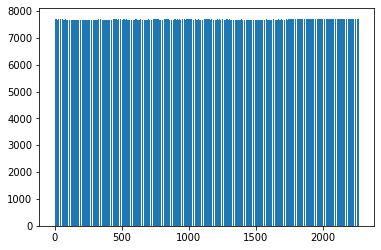

neighbours visited: [7713.0, 7755.0, 7713.0]
approximation ratio: 1.0033737009633787
time taken: 0.369046688079834
k is:  4


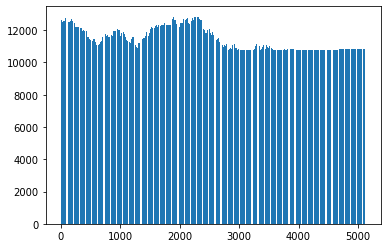

neighbours visited: [12830.0, 12830.0]
approximation ratio: 1.1216888056928525
time taken: 0.33034300804138184
k is:  3


IndexError: index 3056 is out of bounds for axis 0 with size 3056

In [21]:
for i in range(len(instances)):
    set_inst(instances[i])
    A = agent()
    k = np.random.randint(1,11)
    print('k is: ', k)
    A.greedySearch(allowableTime,k)
    A.print_results()

In [22]:
len(instances)

99

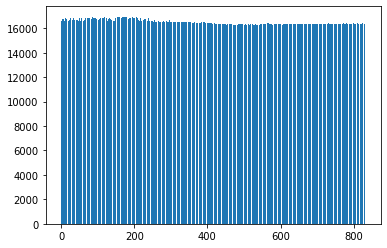

neighbours visited: [16947.0]
approximation ratio: 1.0265947365911072
time taken: None


In [25]:
set_inst(instances[98])
A = agent()
A.generateGreedySolution()
A.print_results()

In [27]:
M = [np.random.randint(50,i) for i in range(100,10000,100)]
P = np.random.randint(2000,40000,len(M))
instances = {i:np.append(30,np.append(M[i],1 + np.random.randint(np.random.randint(1,1000),size = P[i]) )) for i in range(len(M))}

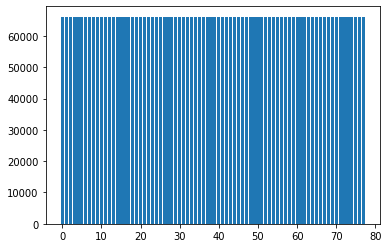

neighbours visited: [66123.0]
approximation ratio: 1.0000003877778623
time taken: None


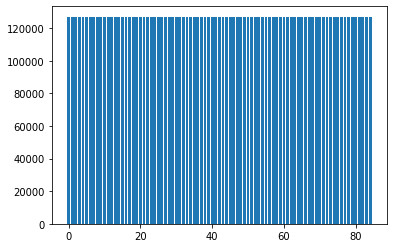

neighbours visited: [127122.0]
approximation ratio: 1.0000049975400997
time taken: None


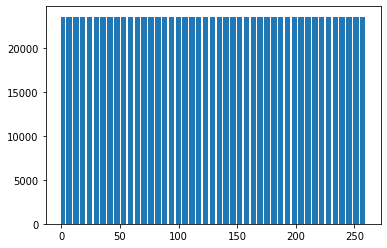

neighbours visited: [23527.0]
approximation ratio: 1.000044631566419
time taken: None


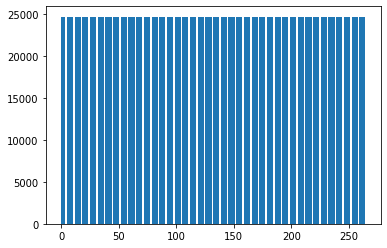

neighbours visited: [24711.0]
approximation ratio: 1.0001182105127633
time taken: None


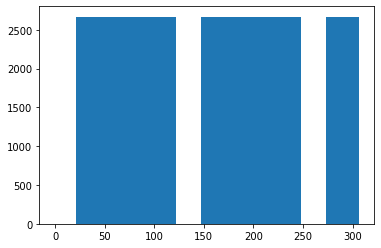

neighbours visited: [2667.0]
approximation ratio: 1.000201562660334
time taken: None


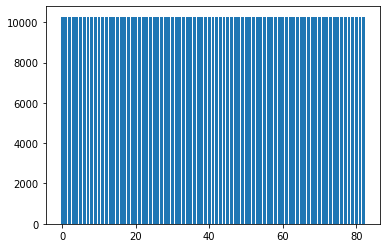

neighbours visited: [10273.0]
approximation ratio: 1.0000914869085753
time taken: None


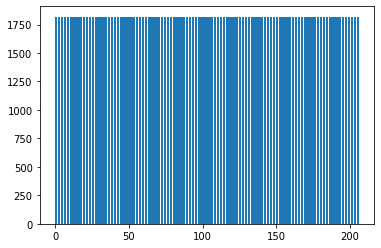

neighbours visited: [1819.0]
approximation ratio: 1.0002550227528113
time taken: None


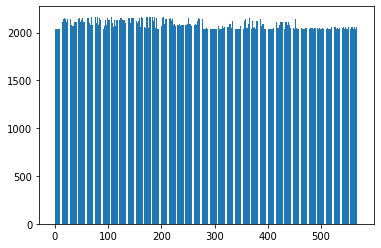

neighbours visited: [2166.0]
approximation ratio: 1.0393979815266907
time taken: None


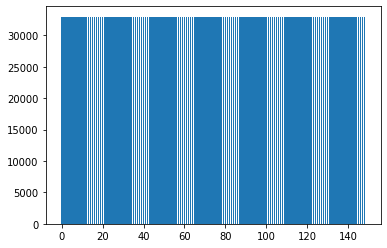

neighbours visited: [32959.0]
approximation ratio: 1.0000433748659554
time taken: None


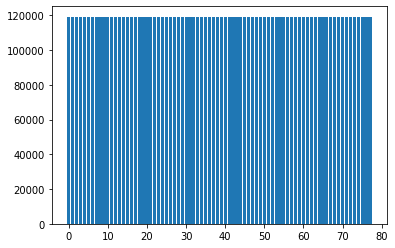

neighbours visited: [119272.0]
approximation ratio: 1.0000063419331737
time taken: None


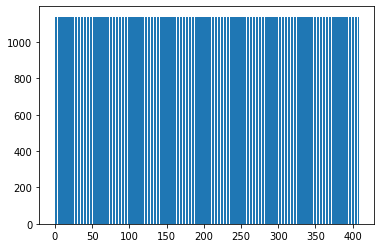

neighbours visited: [1140.0]
approximation ratio: 1.000710408667415
time taken: None


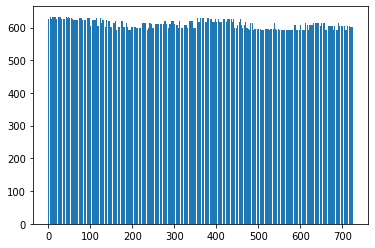

neighbours visited: [633.0]
approximation ratio: 1.0371983384034027
time taken: None


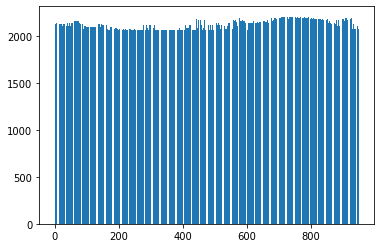

neighbours visited: [2207.0]
approximation ratio: 1.0377987285006611
time taken: None


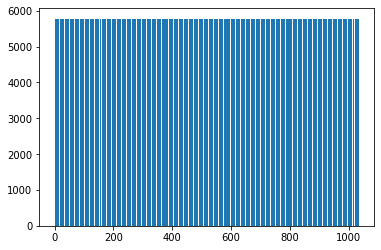

neighbours visited: [5780.0]
approximation ratio: 1.0020640100834273
time taken: None


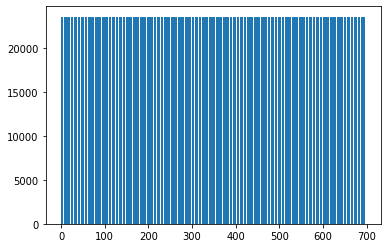

neighbours visited: [23515.0]
approximation ratio: 1.000152616751815
time taken: None


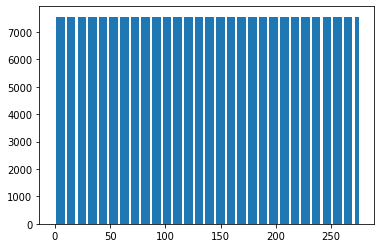

neighbours visited: [7559.0]
approximation ratio: 1.0001198446429924
time taken: None


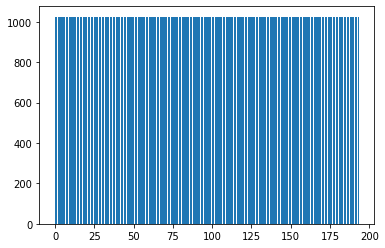

neighbours visited: [1025.0]
approximation ratio: 1.0005685906499544
time taken: None


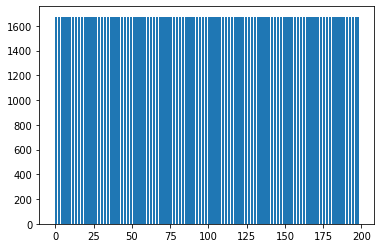

neighbours visited: [1674.0]
approximation ratio: 1.0012473287628
time taken: None


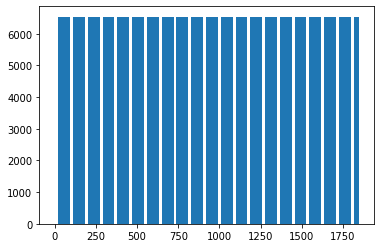

neighbours visited: [6539.0]
approximation ratio: 1.001635287985427
time taken: None


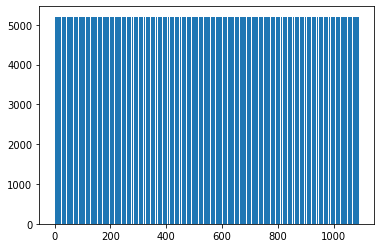

neighbours visited: [5200.0]
approximation ratio: 1.0005303170456454
time taken: None


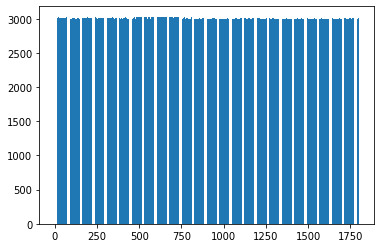

neighbours visited: [3029.0]
approximation ratio: 1.0073844916999908
time taken: None


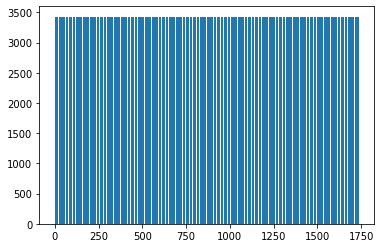

neighbours visited: [3428.0]
approximation ratio: 1.0010807482972164
time taken: None


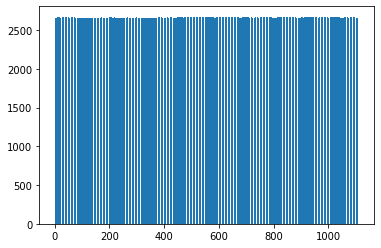

neighbours visited: [2672.0]
approximation ratio: 1.003006724067047
time taken: None


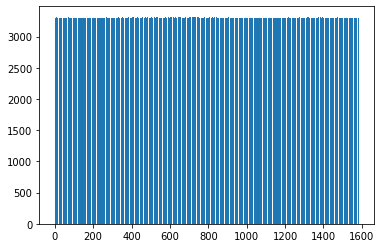

neighbours visited: [3319.0]
approximation ratio: 1.003946030358305
time taken: None


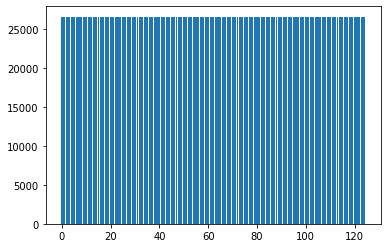

neighbours visited: [26573.0]
approximation ratio: 1.0000036127026237
time taken: None


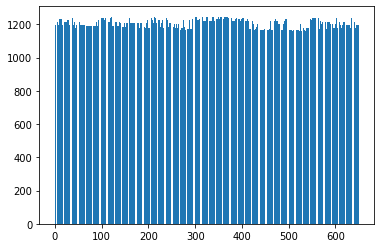

neighbours visited: [1246.0]
approximation ratio: 1.034020941847747
time taken: None


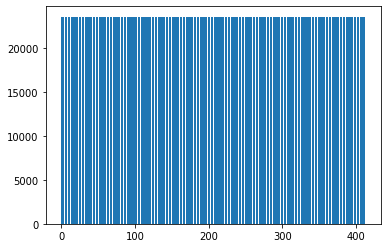

neighbours visited: [23620.0]
approximation ratio: 1.0000902177322952
time taken: None


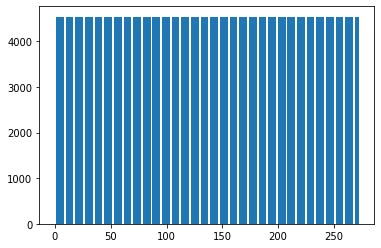

neighbours visited: [4542.0]
approximation ratio: 1.000109692457837
time taken: None


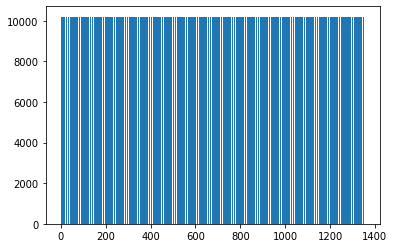

neighbours visited: [10198.0]
approximation ratio: 1.0006761713415722
time taken: None


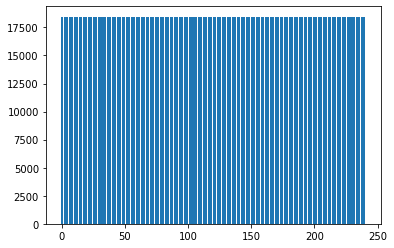

neighbours visited: [18455.0]
approximation ratio: 1.0000838714522713
time taken: None


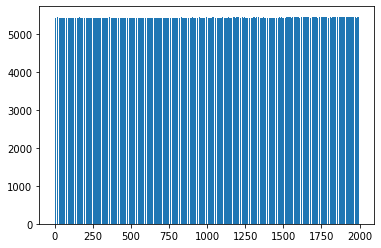

neighbours visited: [5446.0]
approximation ratio: 1.0050814317068135
time taken: None


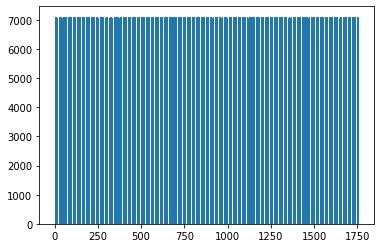

neighbours visited: [7113.0]
approximation ratio: 1.0020509463625058
time taken: None


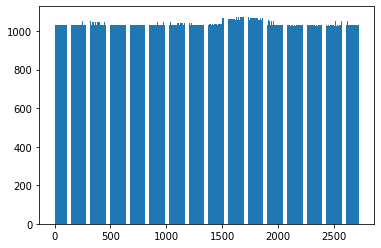

neighbours visited: [1074.0]
approximation ratio: 1.0354767670604126
time taken: None


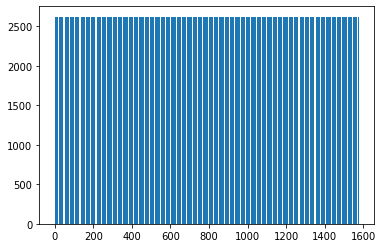

neighbours visited: [2621.0]
approximation ratio: 1.001358353425947
time taken: None


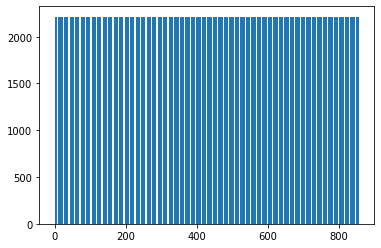

neighbours visited: [2214.0]
approximation ratio: 1.0005145802115731
time taken: None


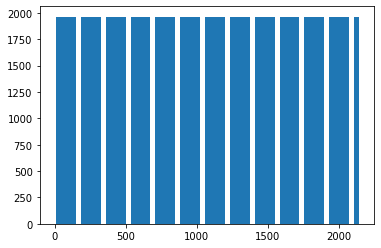

neighbours visited: [1964.0]
approximation ratio: 1.0015334065611907
time taken: None


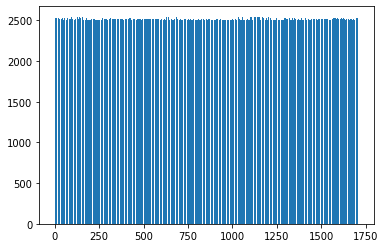

neighbours visited: [2546.0]
approximation ratio: 1.0113872427817487
time taken: None


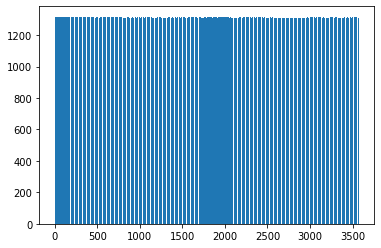

neighbours visited: [1317.0]
approximation ratio: 1.0031994396933308
time taken: None


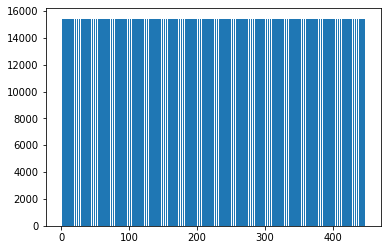

neighbours visited: [15436.0]
approximation ratio: 1.0006685277398495
time taken: None


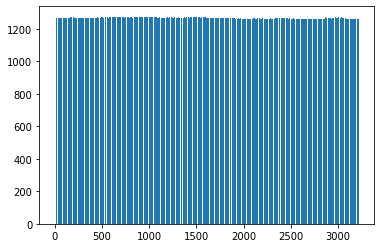

neighbours visited: [1274.0]
approximation ratio: 1.0060455179839587
time taken: None


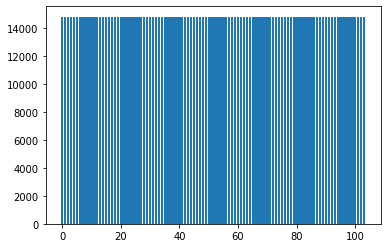

neighbours visited: [14810.0]
approximation ratio: 1.000014932960745
time taken: None


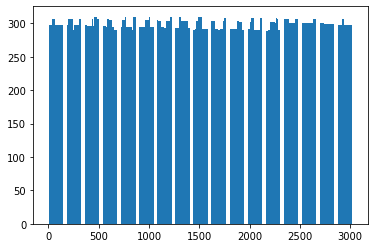

neighbours visited: [310.0]
approximation ratio: 1.0355501701693748
time taken: None


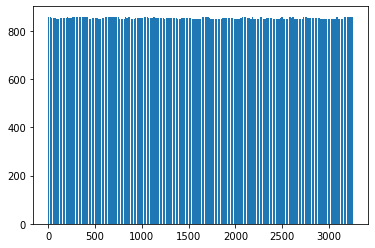

neighbours visited: [859.0]
approximation ratio: 1.0065487936622255
time taken: None


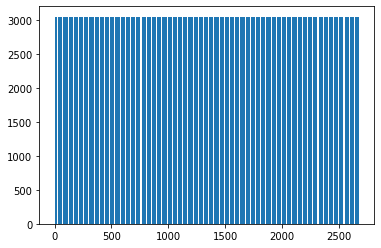

neighbours visited: [3047.0]
approximation ratio: 1.0025767021452596
time taken: None


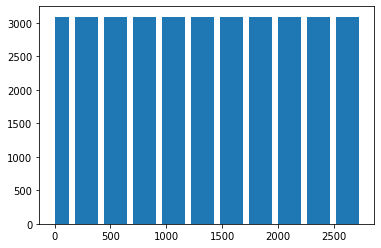

neighbours visited: [3094.0]
approximation ratio: 1.000767211015505
time taken: None


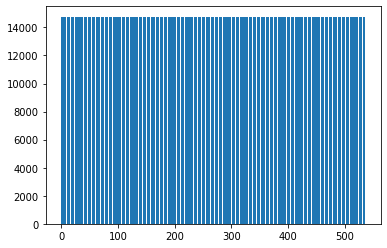

neighbours visited: [14763.0]
approximation ratio: 1.000184323773982
time taken: None


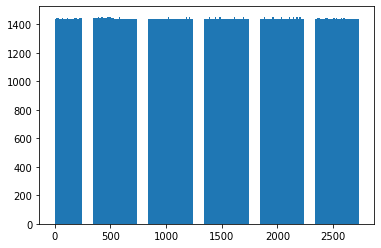

neighbours visited: [1453.0]
approximation ratio: 1.0089688331017808
time taken: None


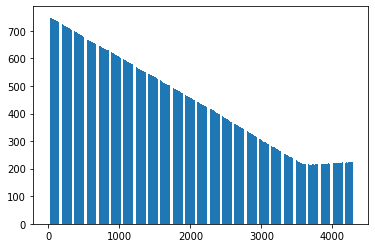

neighbours visited: [751.0]
approximation ratio: 1.6970194476912621
time taken: None


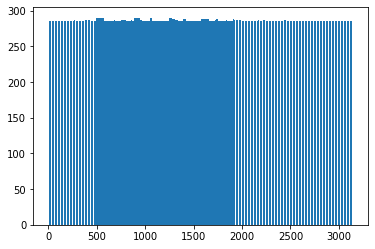

neighbours visited: [290.0]
approximation ratio: 1.0134125351813765
time taken: None


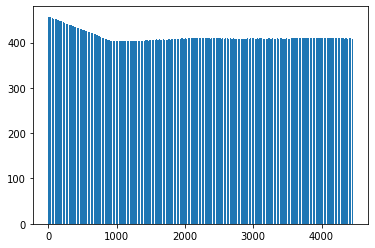

neighbours visited: [457.0]
approximation ratio: 1.1075907576398716
time taken: None


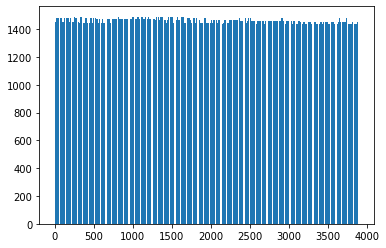

neighbours visited: [1490.0]
approximation ratio: 1.0190773931270931
time taken: None


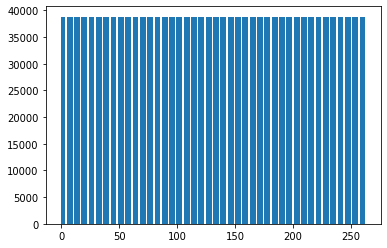

neighbours visited: [38793.0]
approximation ratio: 1.0000317577471995
time taken: None


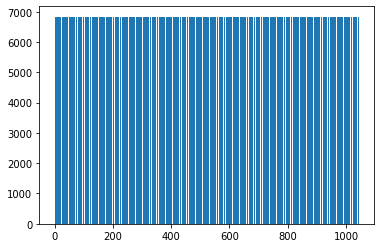

neighbours visited: [6834.0]
approximation ratio: 1.0006734182238237
time taken: None


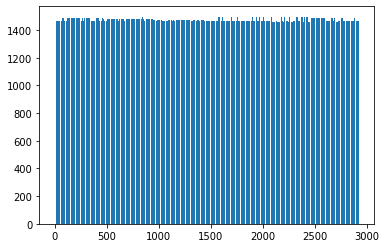

neighbours visited: [1497.0]
approximation ratio: 1.0156127597231477
time taken: None


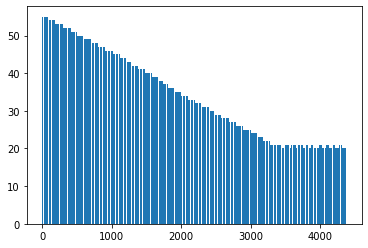

neighbours visited: [55.0]
approximation ratio: 1.6140013146774346
time taken: None


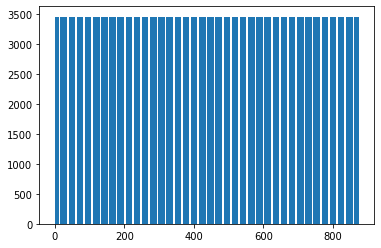

neighbours visited: [3459.0]
approximation ratio: 1.000363158075447
time taken: None


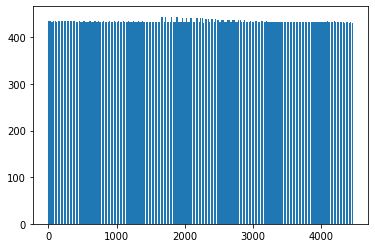

neighbours visited: [444.0]
approximation ratio: 1.0236948604640588
time taken: None


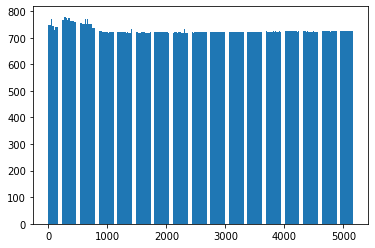

neighbours visited: [779.0]
approximation ratio: 1.0706691145709817
time taken: None


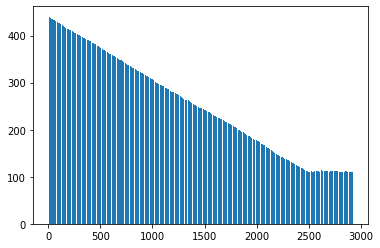

neighbours visited: [440.0]
approximation ratio: 1.7523909183933464
time taken: None


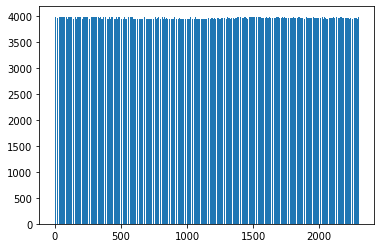

neighbours visited: [3991.0]
approximation ratio: 1.0060157611233216
time taken: None


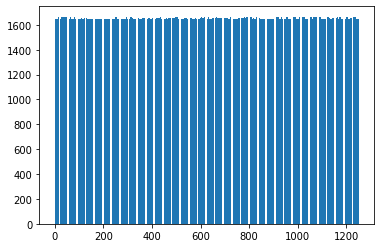

neighbours visited: [1666.0]
approximation ratio: 1.0078060993690525
time taken: None


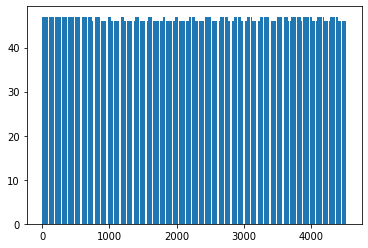

neighbours visited: [47.0]
approximation ratio: 1.00975558735577
time taken: None


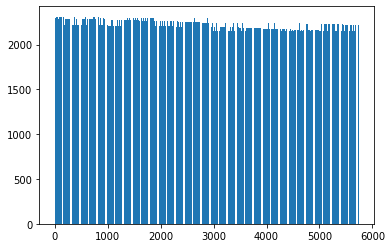

neighbours visited: [2311.0]
approximation ratio: 1.0386414527125767
time taken: None


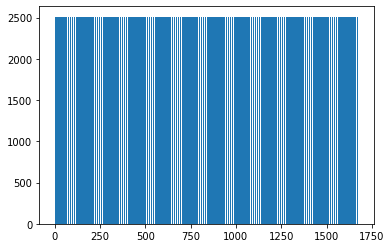

neighbours visited: [2510.0]
approximation ratio: 1.001545022379667
time taken: None


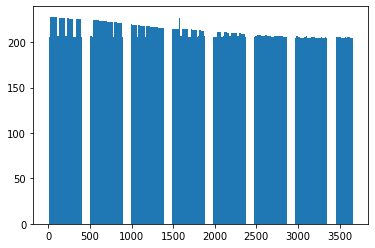

neighbours visited: [228.0]
approximation ratio: 1.0729894627209196
time taken: None


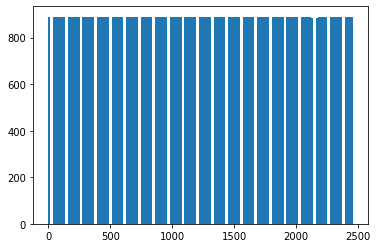

neighbours visited: [890.0]
approximation ratio: 1.0025772616629232
time taken: None


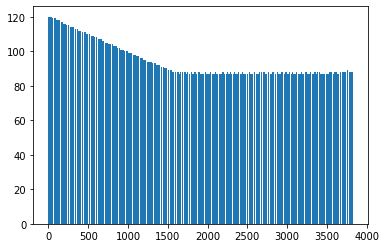

neighbours visited: [120.0]
approximation ratio: 1.273130110946889
time taken: None


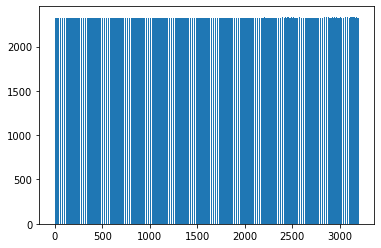

neighbours visited: [2336.0]
approximation ratio: 1.0054297340119684
time taken: None


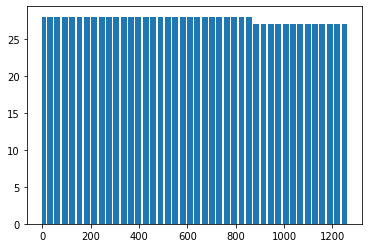

neighbours visited: [28.0]
approximation ratio: 1.011186965750674
time taken: None


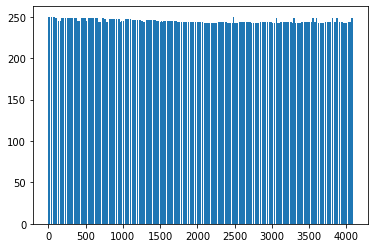

neighbours visited: [250.0]
approximation ratio: 1.019707697096926
time taken: None


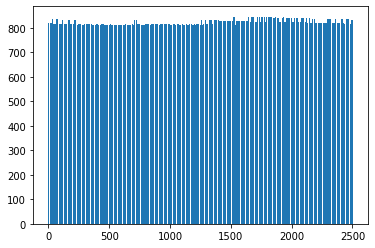

neighbours visited: [845.0]
approximation ratio: 1.0264323853523687
time taken: None


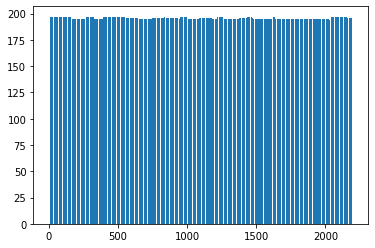

neighbours visited: [197.0]
approximation ratio: 1.0059796390387992
time taken: None


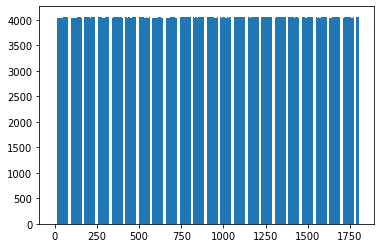

neighbours visited: [4059.0]
approximation ratio: 1.0025796884958709
time taken: None


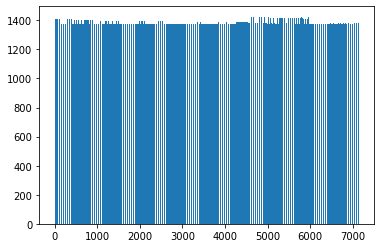

neighbours visited: [1425.0]
approximation ratio: 1.0289970705723548
time taken: None


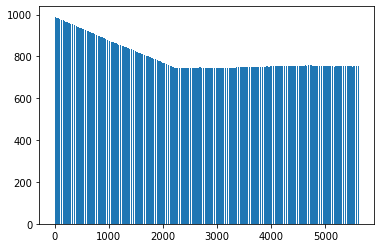

neighbours visited: [990.0]
approximation ratio: 1.2428542506231233
time taken: None


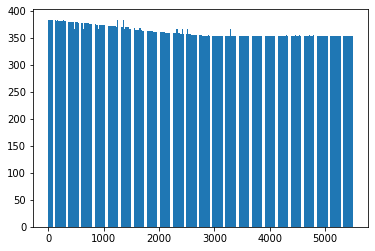

neighbours visited: [384.0]
approximation ratio: 1.061484966004133
time taken: None


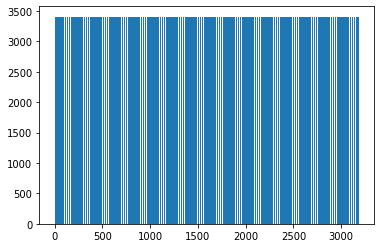

neighbours visited: [3407.0]
approximation ratio: 1.0023716716515239
time taken: None


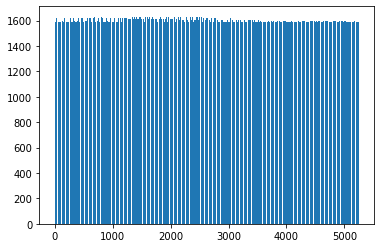

neighbours visited: [1631.0]
approximation ratio: 1.0173267414906357
time taken: None


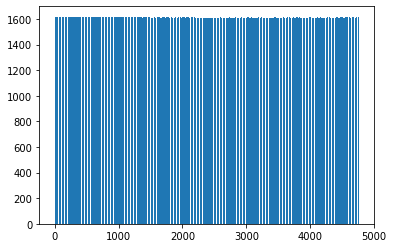

neighbours visited: [1617.0]
approximation ratio: 1.003427215853117
time taken: None


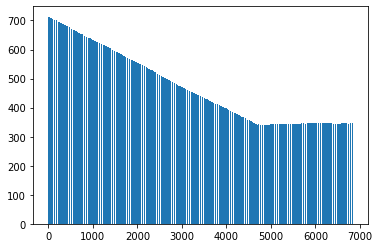

neighbours visited: [713.0]
approximation ratio: 1.5187976951504019
time taken: None


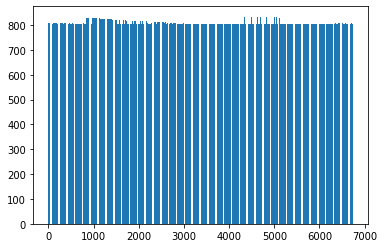

neighbours visited: [834.0]
approximation ratio: 1.0302609662826918
time taken: None


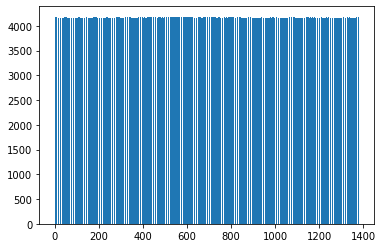

neighbours visited: [4185.0]
approximation ratio: 1.0035666254843552
time taken: None


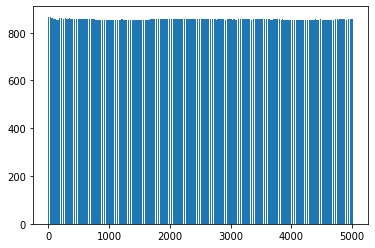

neighbours visited: [867.0]
approximation ratio: 1.0126979516846144
time taken: None


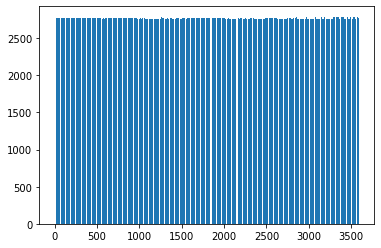

neighbours visited: [2788.0]
approximation ratio: 1.0080865668500458
time taken: None


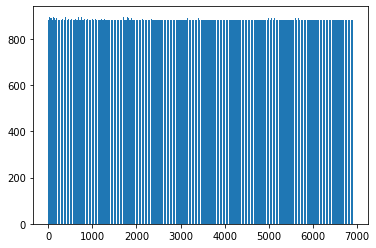

neighbours visited: [896.0]
approximation ratio: 1.014450756128196
time taken: None


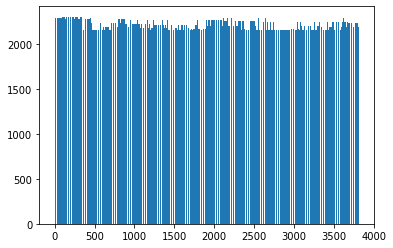

neighbours visited: [2308.0]
approximation ratio: 1.0408904090885072
time taken: None


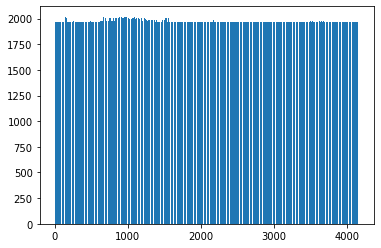

neighbours visited: [2018.0]
approximation ratio: 1.022974310012562
time taken: None


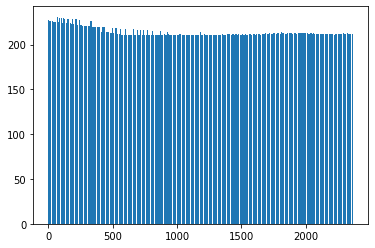

neighbours visited: [231.0]
approximation ratio: 1.0777371298818539
time taken: None


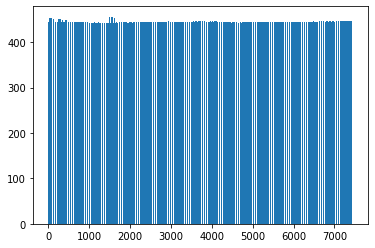

neighbours visited: [456.0]
approximation ratio: 1.0249238162318957
time taken: None


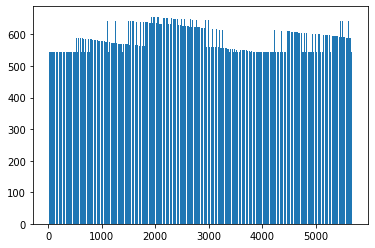

neighbours visited: [656.0]
approximation ratio: 1.120659787580028
time taken: None


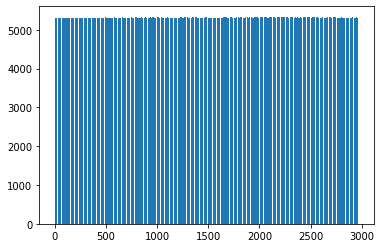

neighbours visited: [5339.0]
approximation ratio: 1.0040568132233907
time taken: None


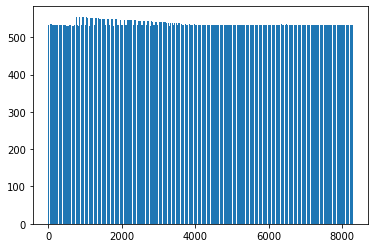

neighbours visited: [555.0]
approximation ratio: 1.0356804319387936
time taken: None


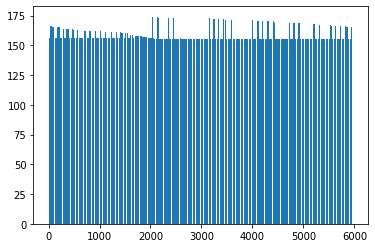

neighbours visited: [174.0]
approximation ratio: 1.0985361687554633
time taken: None


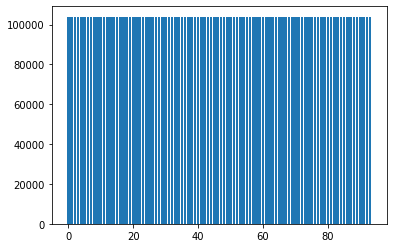

neighbours visited: [103913.0]
approximation ratio: 1.0000054260087436
time taken: None


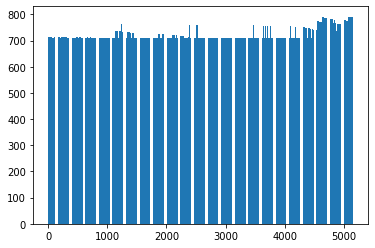

neighbours visited: [791.0]
approximation ratio: 1.095000311687865
time taken: None


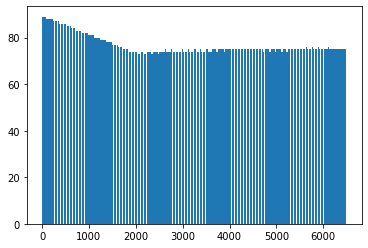

neighbours visited: [89.0]
approximation ratio: 1.1605292955574829
time taken: None


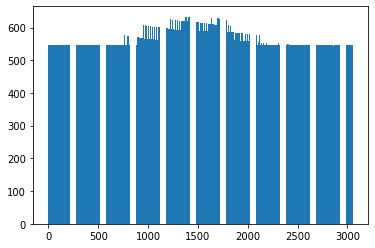

neighbours visited: [633.0]
approximation ratio: 1.115683076571476
time taken: None


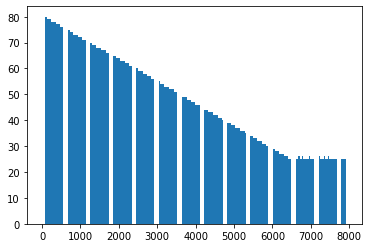

neighbours visited: [80.0]
approximation ratio: 1.6719263694341404
time taken: None


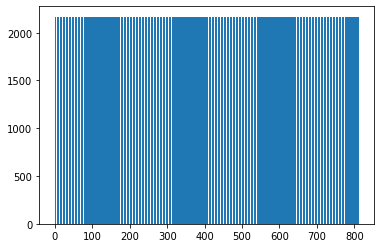

neighbours visited: [2167.0]
approximation ratio: 1.0012104741819496
time taken: None


In [29]:
for i in range(len(instances)):
    set_inst(instances[i])
    A = agent()
    A.generateGreedySolution()
    A.print_results()

In [5]:
costs = []
times = []
for i in range(len(instances)):
    for k in range(5):
        set_inst(instances[i])
        A = agent()
        A.greedySearch(allowableTime,k)
        A.verifyFeasibleSolution()
        times.append(A.time_taken)
        costs.append(A.costTrajectory[-1])
   

        
        

KeyboardInterrupt: 

In [7]:
times

[0.08078479766845703,
 0.0638270378112793,
 0.10776495933532715,
 0.09170246124267578,
 0.08680534362792969,
 0.16372966766357422,
 0.21744441986083984,
 0.21043801307678223,
 0.21242618560791016,
 0.21440839767456055,
 0.1911921501159668,
 0.18953371047973633,
 0.20141220092773438,
 0.2478342056274414,
 0.19341731071472168,
 0.21741867065429688,
 0.23237943649291992,
 0.27477312088012695,
 0.2722437381744385,
 0.2672102451324463,
 0.15310311317443848,
 0.13115620613098145,
 0.15013885498046875,
 0.1904902458190918,
 0.17857098579406738,
 0.06388044357299805,
 0.07075667381286621,
 0.07779335975646973,
 0.0818173885345459,
 0.07278776168823242,
 0.11527705192565918,
 0.12366604804992676,
 0.16015410423278809,
 0.1524357795715332,
 0.1519160270690918,
 0.18345999717712402,
 0.2044203281402588,
 0.22539114952087402,
 0.21447515487670898,
 0.22603106498718262,
 0.027875185012817383,
 0.04089045524597168,
 0.050904273986816406,
 0.04290151596069336,
 0.035902976989746094,
 0.09944534301757

In [6]:
costs

[319519.0,
 319519.0,
 319518.0,
 319519.0,
 319519.0,
 669419.0,
 669419.0,
 669419.0,
 669419.0,
 669419.0,
 1758807.0,
 1758807.0,
 1758807.0,
 1758806.0,
 1758807.0,
 220472.0,
 220472.0,
 220472.0,
 220472.0,
 220472.0,
 267426.0,
 267426.0,
 267426.0,
 267426.0,
 267426.0,
 34854.0,
 34853.0,
 34854.0,
 34854.0,
 34854.0,
 69869.0,
 69869.0,
 69869.0,
 69869.0,
 69869.0,
 142446.0,
 142446.0,
 142446.0,
 142446.0,
 142446.0,
 4229.0,
 4221.0,
 4219.0,
 4219.0,
 4221.0,
 49379.0,
 49379.0,
 49379.0,
 49379.0,
 49379.0,
 58067.0,
 58067.0,
 58066.0,
 58064.0,
 58064.0,
 42694.0,
 42694.0,
 42694.0,
 42694.0,
 42694.0,
 66127.0,
 66127.0,
 66127.0,
 66127.0,
 66127.0,
 62980.0,
 62980.0,
 62980.0,
 62980.0,
 62980.0,
 87452.0,
 87452.0,
 87452.0,
 87452.0,
 87452.0,
 16747.0,
 16747.0,
 16746.0,
 16746.0,
 16743.0,
 59046.0,
 59046.0,
 59046.0,
 59046.0,
 59046.0,
 85671.0,
 85671.0,
 85671.0,
 85671.0,
 85671.0,
 7239.0,
 7239.0,
 7239.0,
 7239.0,
 7239.0,
 12386.0,
 12386.0,
 1238

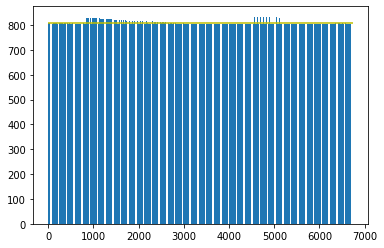

neighbours visited: [834.0, 896.0, 834.0]
approximation ratio: 1.0302609662826918
time taken: 0.31436872482299805


In [37]:
set_inst(instances[80])
A = agent()
A.greedySearch(allowableTime,2)
A.print_results()

In [85]:
# k = "instance"
# for i in range(len(M)):
#     print(k + str(i) + ".txt")

instance0.txt
instance1.txt
instance2.txt
instance3.txt
instance4.txt
instance5.txt
instance6.txt
instance7.txt
instance8.txt
instance9.txt
